In [ ]:
Problem Scenario: The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or
watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to 
always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has
over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends
to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features.
Each cohort would contain similar types of songs.

In [ ]:
Problem Objective: 
As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs.
The goal is to gain a better understanding of the various factors that contribute to creating a cohort of songs.

In [32]:
import pandas as pd

In [33]:
data=pd.read_csv('spotify.csv')

In [34]:
data.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [35]:
data.shape

(1610, 18)

In [36]:
data.head(2)

Unnamed: 0                        name               album release_date  \
0           0  Concert Intro Music - Live  Licked Live In NYC   10-06-2022   
1           1  Street Fighting Man - Live  Licked Live In NYC   10-06-2022   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993             0.996     0.932   -12.913   
1        0.4370         0.326   0.965             0.233     0.961    -4.803   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173

In [37]:
data.info

<bound method DataFrame.info of       Unnamed: 0                         name               album  \
0              0   Concert Intro Music - Live  Licked Live In NYC   
1              1   Street Fighting Man - Live  Licked Live In NYC   
2              2           Start Me Up - Live  Licked Live In NYC   
3              3  If You Can't Rock Me - Live  Licked Live In NYC   
4              4          Donâ€™t Stop - Live  Licked Live In NYC   
...          ...                          ...                 ...   
1605        1605                        Carol  The Rolling Stones   
1606        1606                      Tell Me  The Rolling Stones   
1607        1607          Can I Get A Witness  The Rolling Stones   
1608        1608   You Can Make It If You Try  The Rolling Stones   
1609        1609              Walking The Dog  The Rolling Stones   

     release_date  track_number                      id  \
0      10-06-2022             1  2IEkywLJ4ykbhi1yRQvmsT   
1      10-06-2022    

In [38]:
data.describe()

Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

In [39]:
data.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [40]:
print("Number of duplicate rows:", data.duplicated().sum())
print("Missing values in each column:\n", data.isnull().sum())
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
potential_outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("Potential outliers in each column:\n", potential_outliers)


Number of duplicate rows: 0
Missing values in each column:
 Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64
Potential outliers in each column:
 Unnamed: 0            0
acousticness          4
album                 0
danceability          0
duration_ms          76
energy                8
id                    0
instrumentalness    272
liveness              0
loudness             14
name                  0
popularity           48
release_date          0
speechiness          92
tempo                34
track_number         77
uri                   0
valence               0
dtype: int64


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

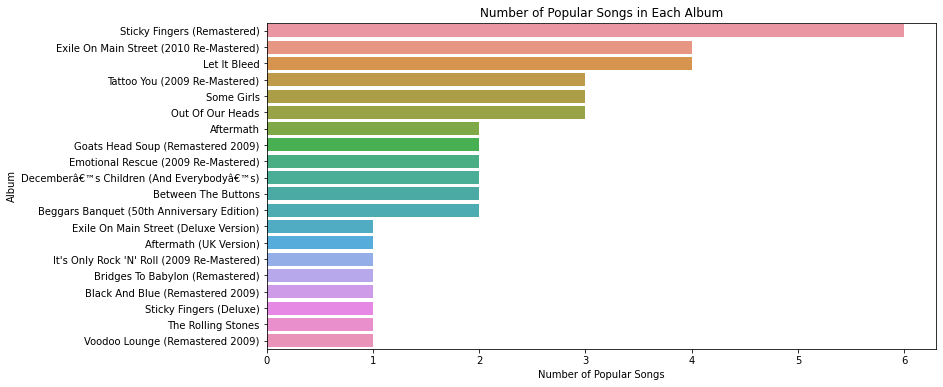

In [42]:
popularity_threshold = 50
popular_songs = data[data['popularity'] >= popularity_threshold]
popular_songs_by_album = popular_songs.groupby('album')['name'].count().reset_index()
popular_songs_by_album = popular_songs_by_album.rename(columns={'name': 'popular_song_count'})
popular_songs_by_album = popular_songs_by_album.sort_values(by='popular_song_count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='popular_song_count', y='album', data=popular_songs_by_album)
plt.xlabel('Number of Popular Songs')
plt.ylabel('Album')
plt.title('Number of Popular Songs in Each Album')
plt.show()

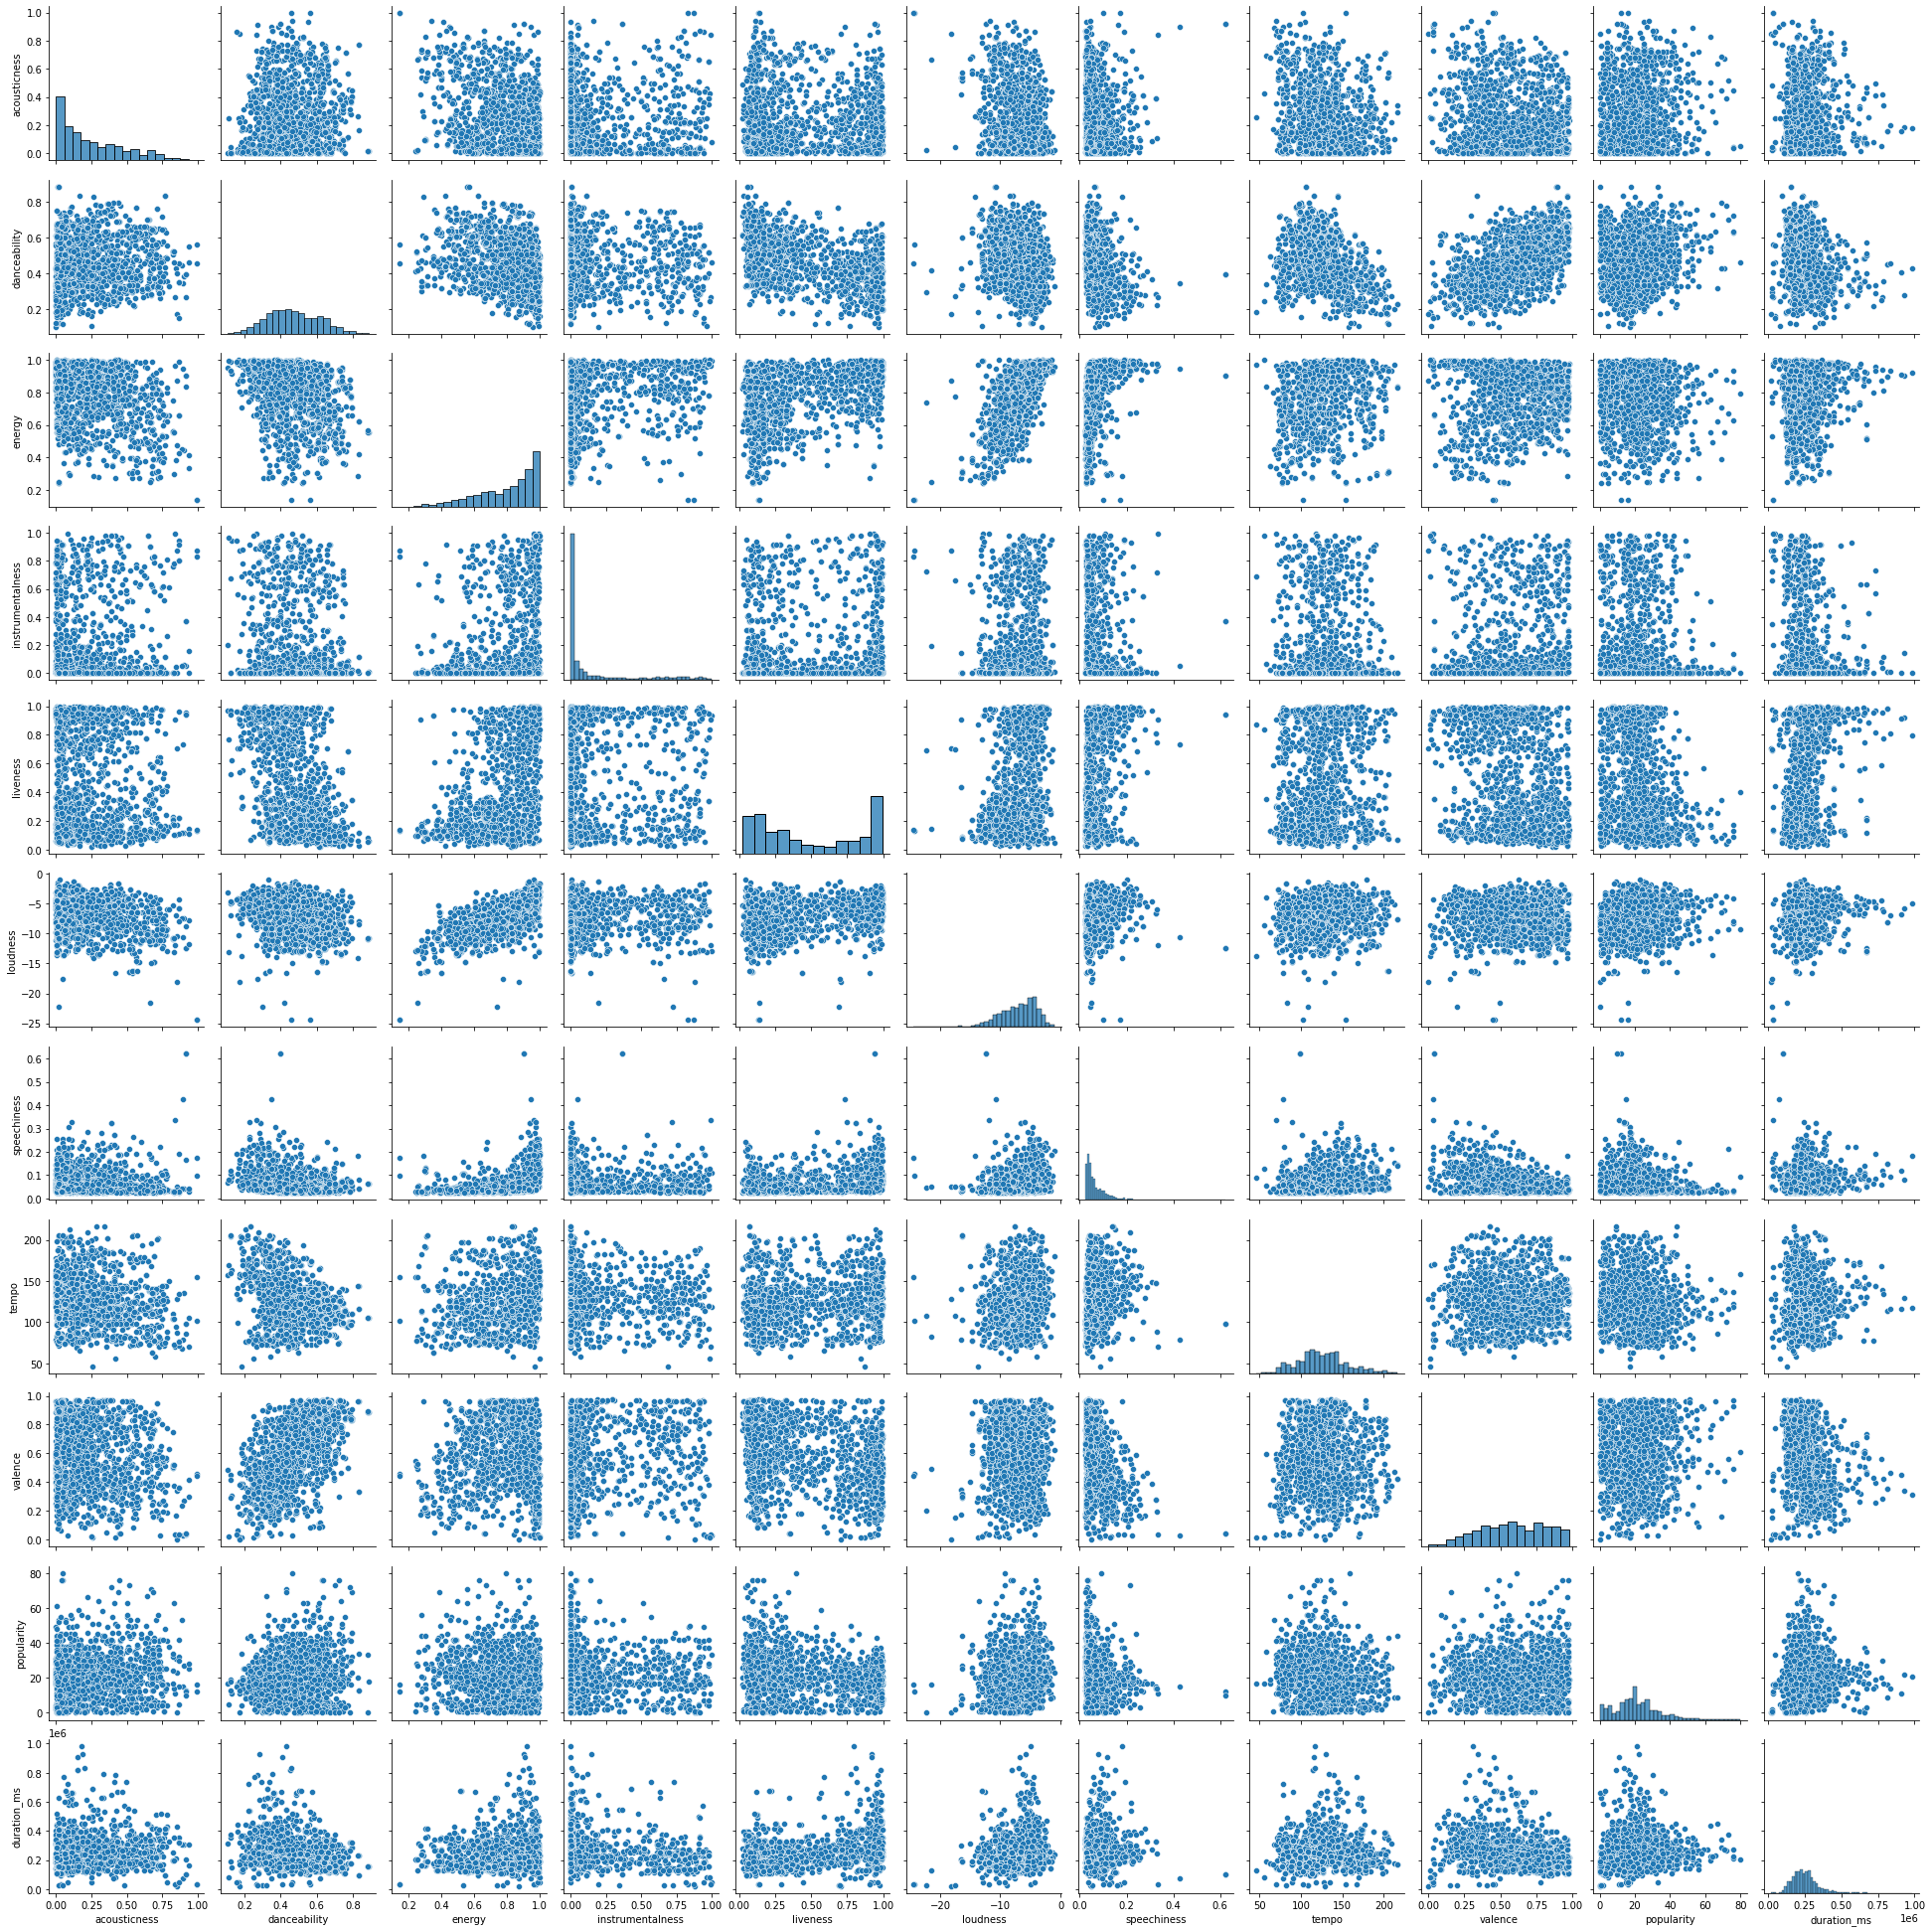

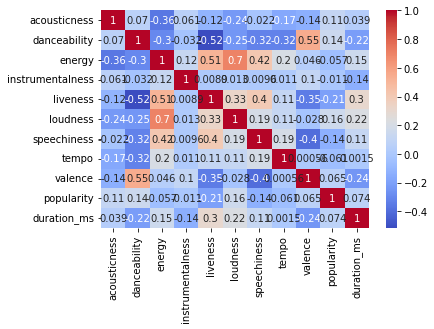

In [43]:
numerical_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                  'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']
sns.pairplot(data[numerical_cols])
plt.show()
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


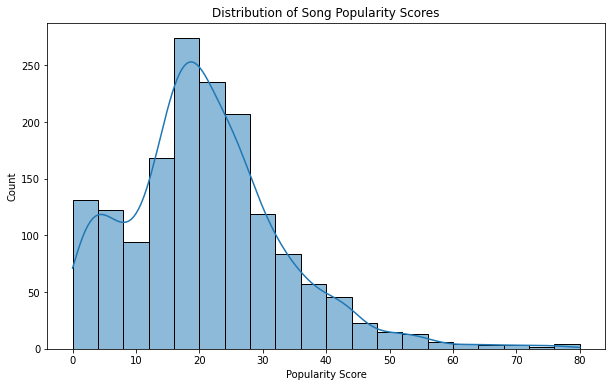

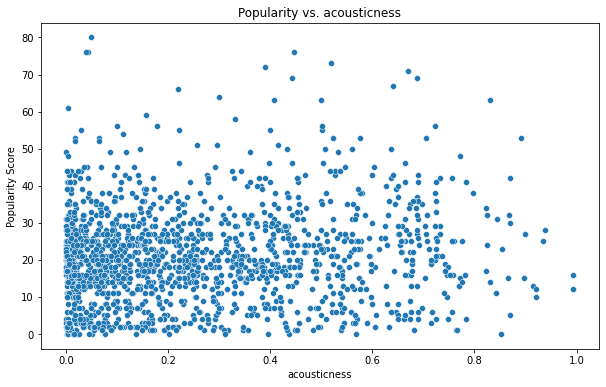

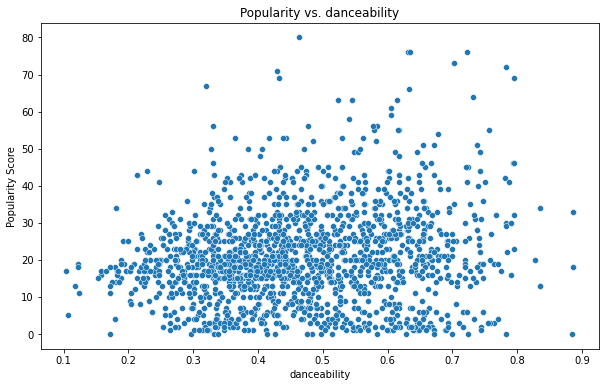

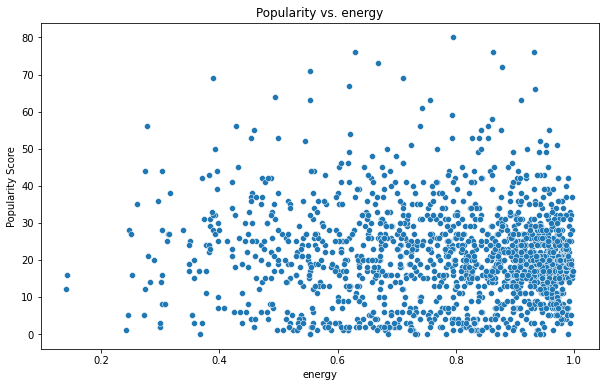

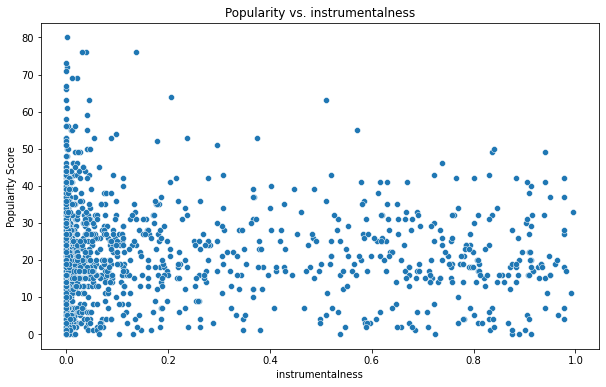

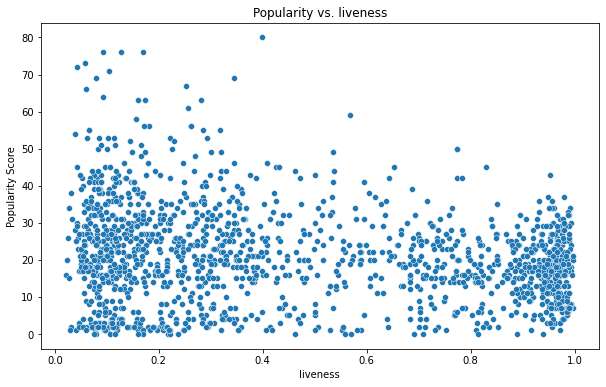

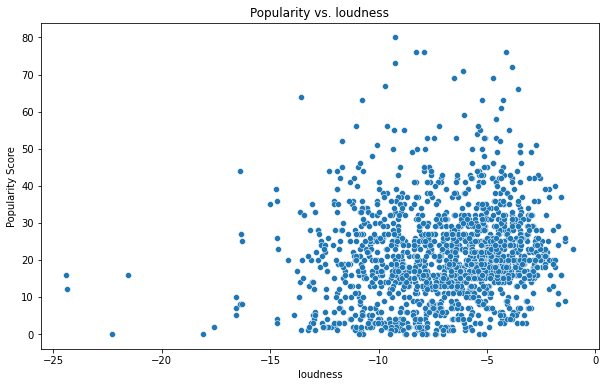

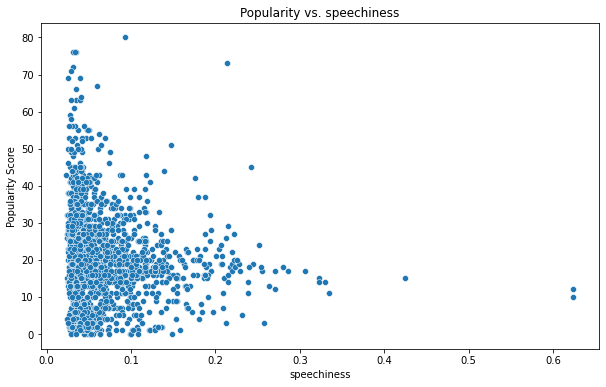

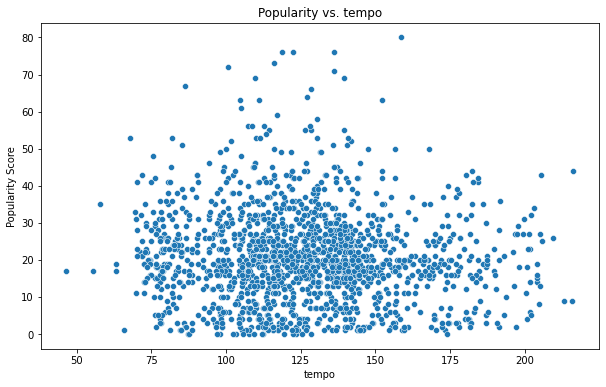

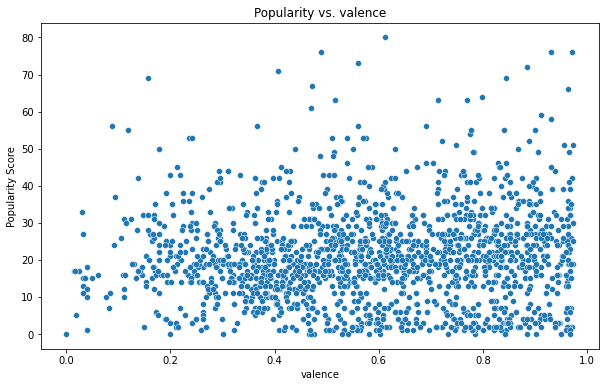

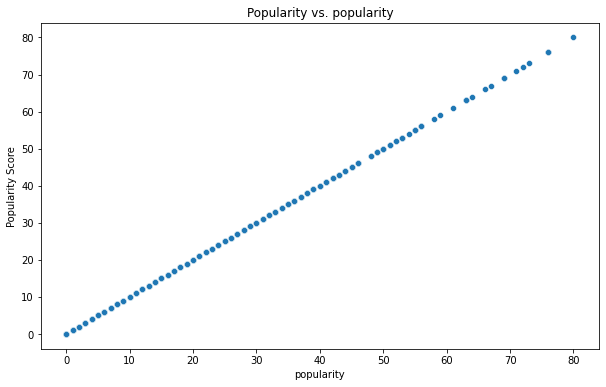

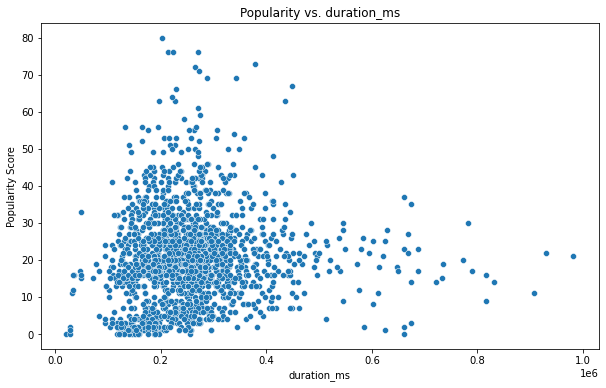

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=20, kde=True)
plt.xlabel('Popularity Score')
plt.ylabel('Count')
plt.title('Distribution of Song Popularity Scores')
plt.show()
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='popularity', data=data)
    plt.xlabel(col)
    plt.ylabel('Popularity Score')
    plt.title(f'Popularity vs. {col}')
    plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


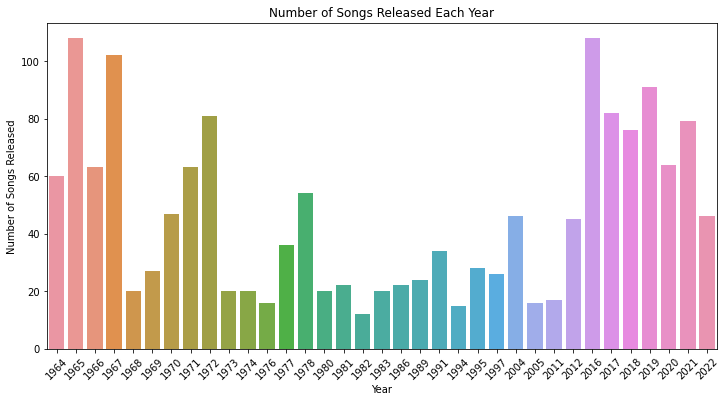

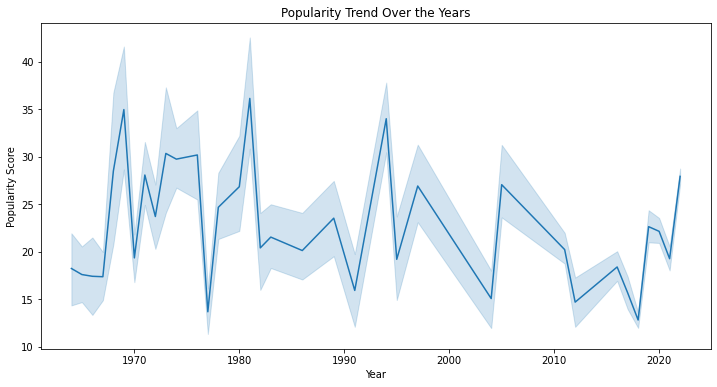

In [45]:
data['release_date'] = pd.to_datetime(data['release_date'])
data['year'] = data['release_date'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(data['year'])
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.title('Number of Songs Released Each Year')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='popularity', data=data)
plt.xlabel('Year')
plt.ylabel('Popularity Score')
plt.title('Popularity Trend Over the Years')
plt.show()



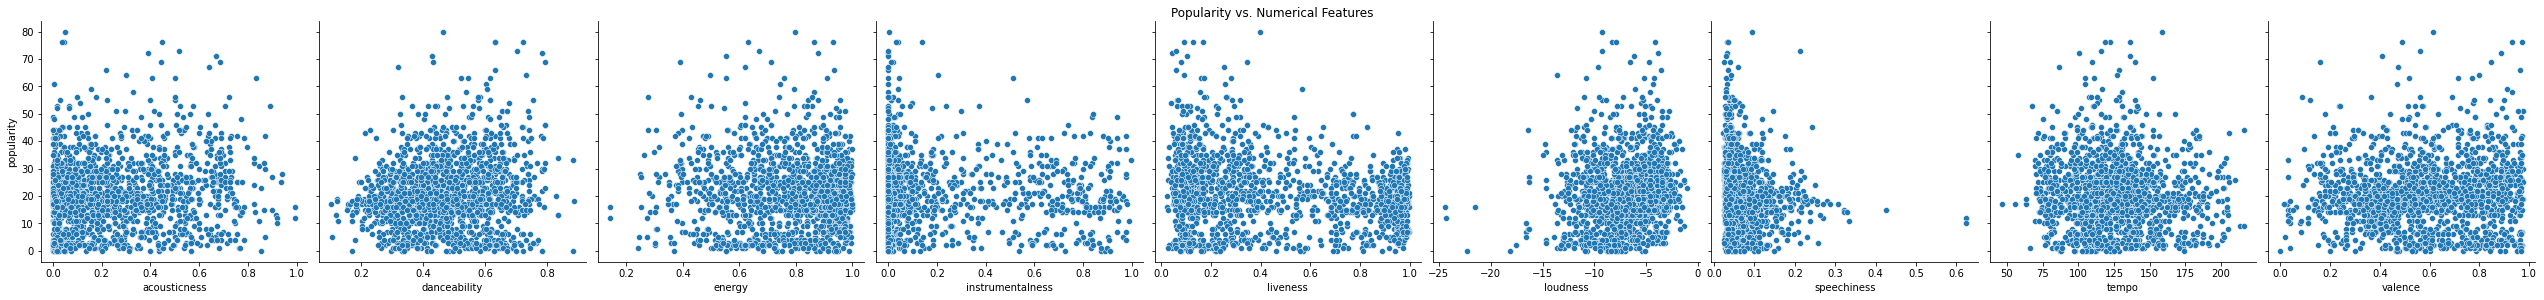

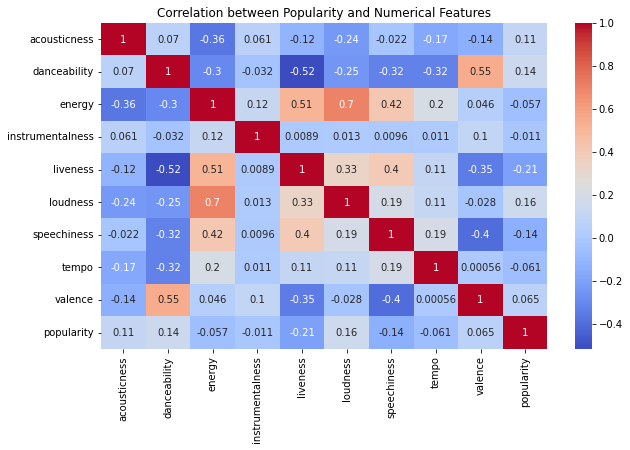

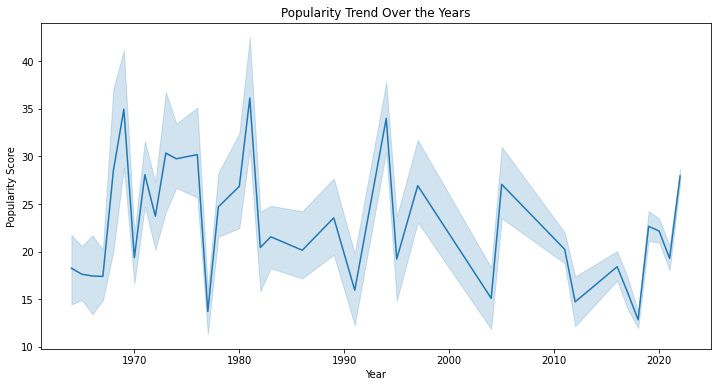

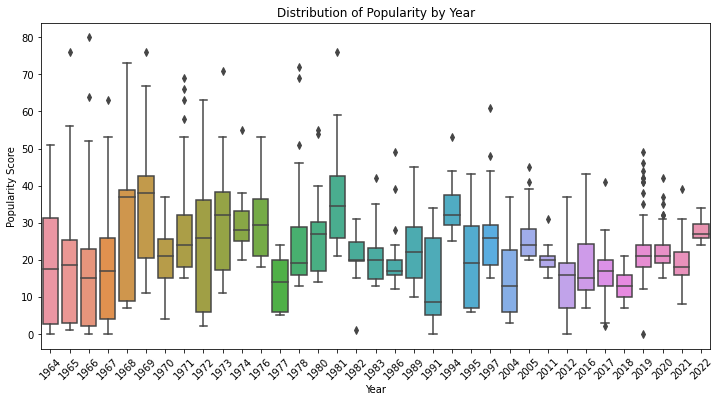

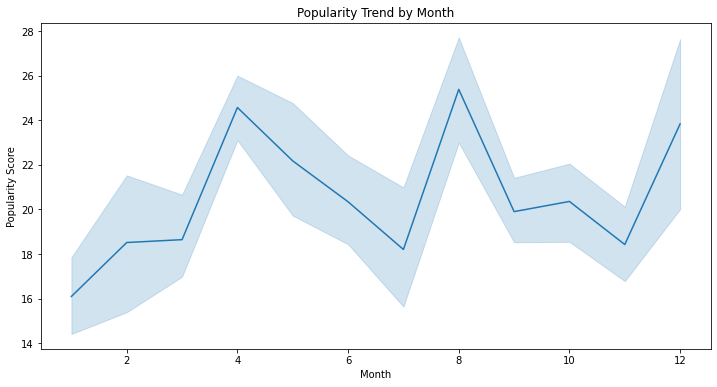

In [46]:
numerical_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                  'loudness', 'speechiness', 'tempo', 'valence']

sns.pairplot(data, x_vars=numerical_cols, y_vars='popularity', height=4)
plt.suptitle('Popularity vs. Numerical Features', y=1.02)
plt.show()

correlation_matrix = data[numerical_cols + ['popularity']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Popularity and Numerical Features')
plt.show()

data['year'] = data['release_date'].dt.year
data['month'] = data['release_date'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='popularity', data=data)
plt.xlabel('Year')
plt.ylabel('Popularity Score')
plt.title('Popularity Trend Over the Years')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='popularity', data=data)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Popularity Score')
plt.title('Distribution of Popularity by Year')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='popularity', data=data)
plt.xlabel('Month')
plt.ylabel('Popularity Score')
plt.title('Popularity Trend by Month')
plt.show()


In [47]:
from sklearn.cluster import KMeans

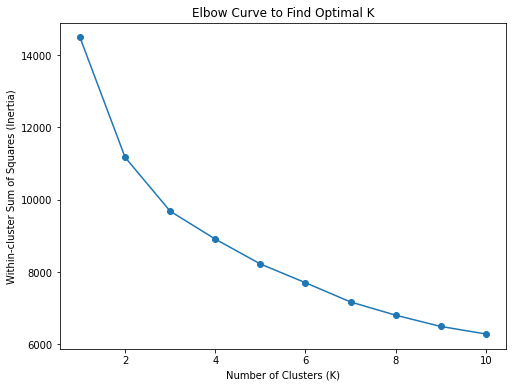

In [48]:
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                      'loudness', 'speechiness', 'tempo', 'valence']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_features])

inertia_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Curve to Find Optimal K')
plt.show()


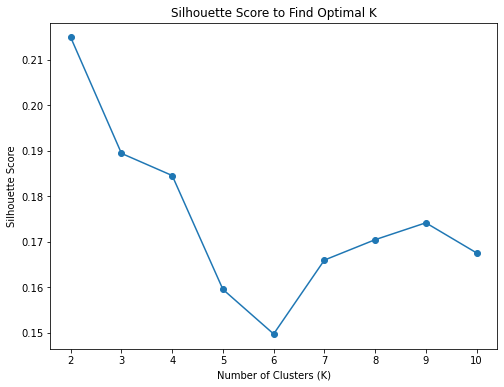

In [49]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, cluster_labels))

plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Find Optimal K')
plt.show()


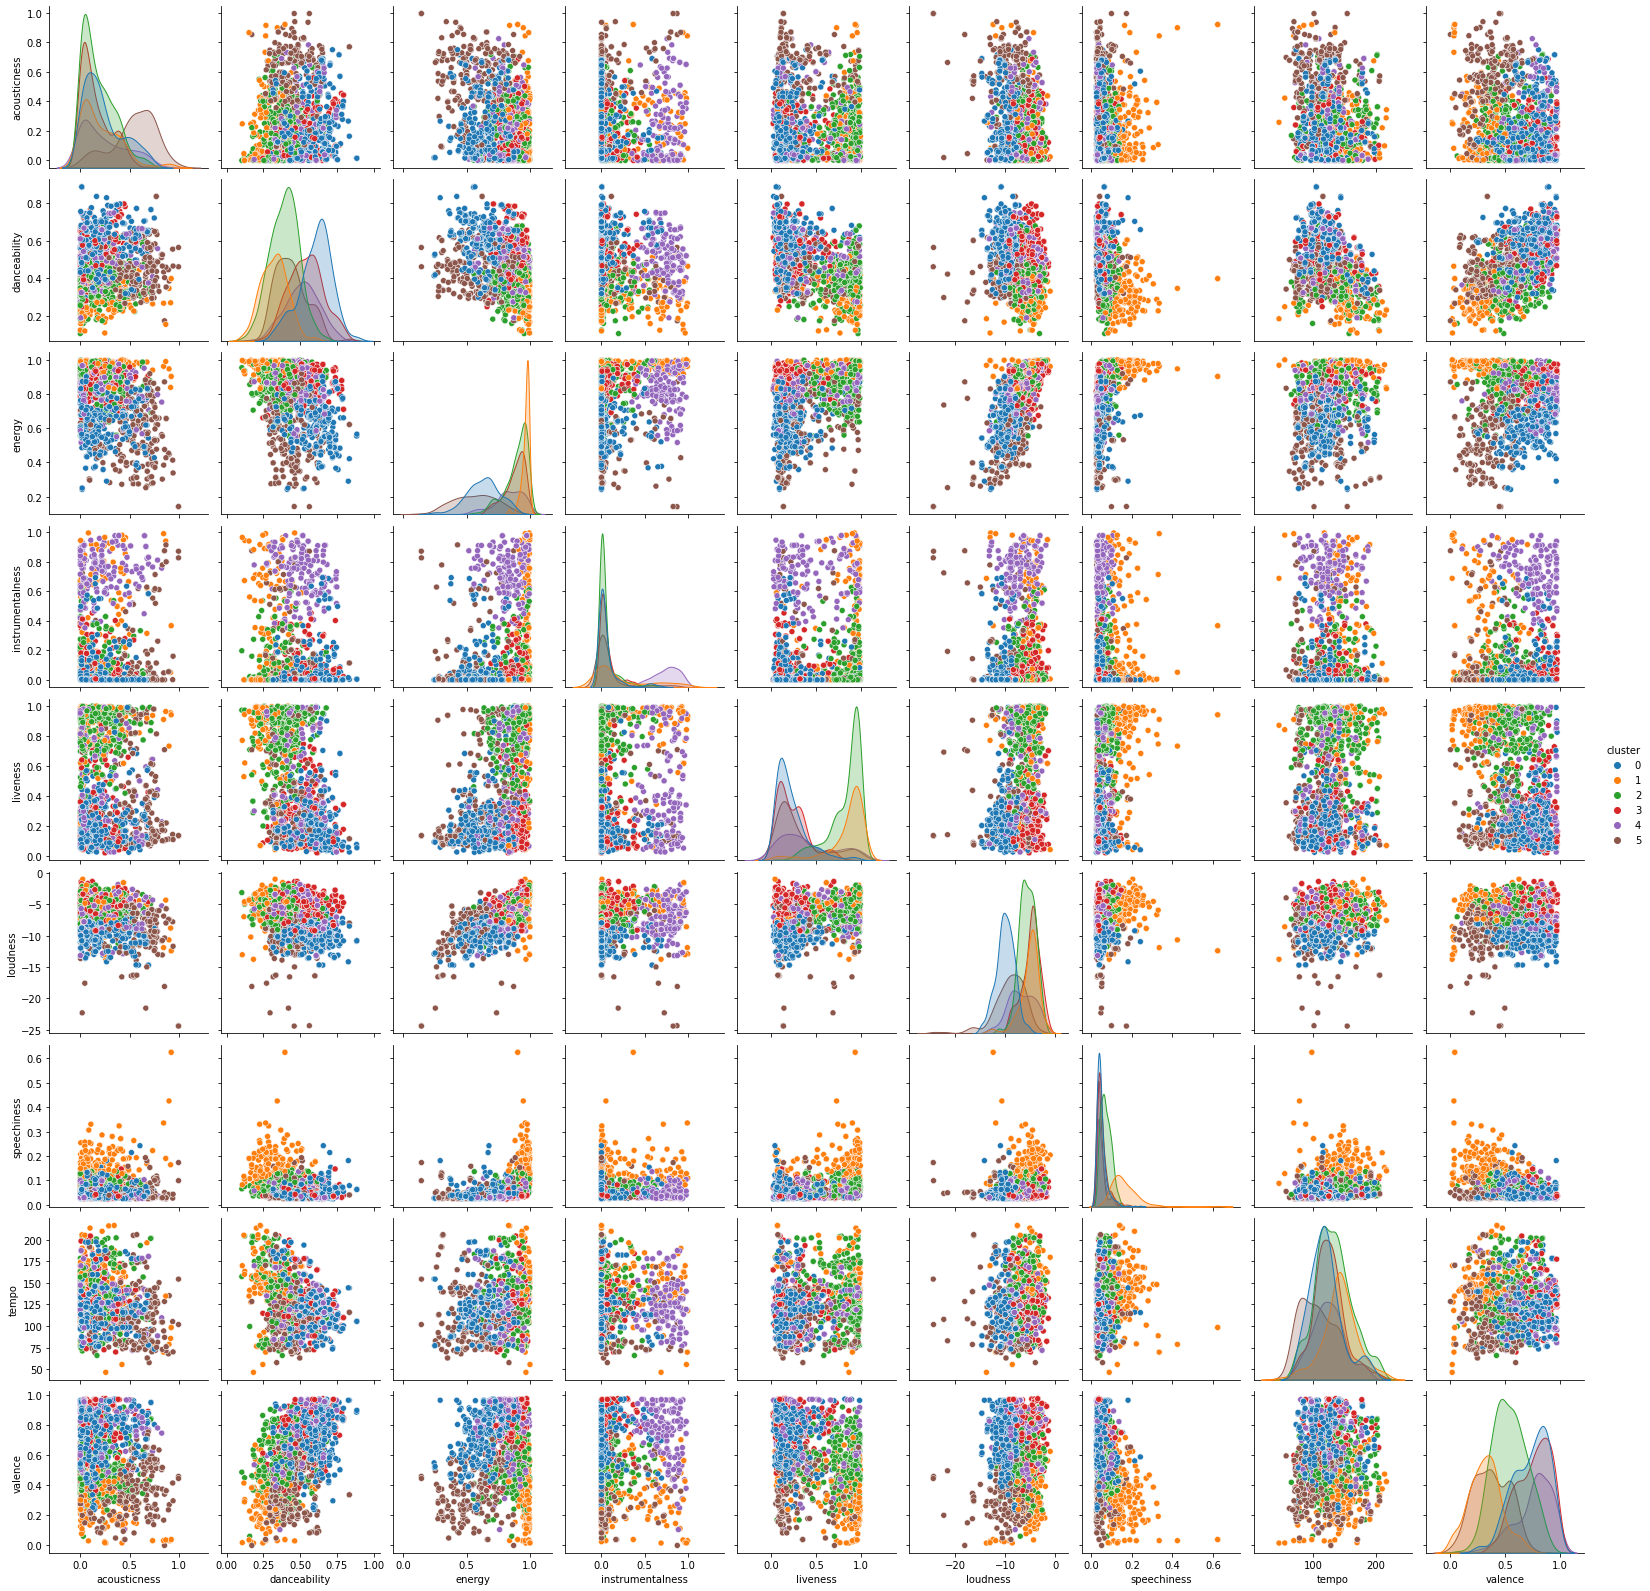

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                      'loudness', 'speechiness', 'tempo', 'valence']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_features])
kmeans = KMeans(n_clusters=6, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)
sns.pairplot(data, hue='cluster', vars=numerical_features, palette='tab10')
plt.show()


Cluster Definitions (Feature Means):
   acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0     -0.087484      0.944771 -0.898928         -0.374246 -0.772140 -1.024968   
1     -0.169285     -1.027218  0.949823          0.259007  0.997704  0.584147   
2     -0.306377     -0.544416  0.544122         -0.393825  0.976239  0.444710   
3     -0.424471      0.496423  0.472328         -0.350382 -0.722026  0.680468   
4     -0.034335      0.308475  0.218078          2.092733 -0.224682  0.068965   
5      1.275900     -0.208767 -1.287710         -0.284208 -0.496462 -0.763562   

   speechiness     tempo   valence  
0    -0.401699 -0.210170  0.628521  
1     1.798408  0.563335 -1.148536  
2     0.021773  0.205257 -0.184773  
3    -0.344324 -0.033515  0.743904  
4    -0.378624 -0.052373  0.753065  
5    -0.443544 -0.489941 -0.901021  


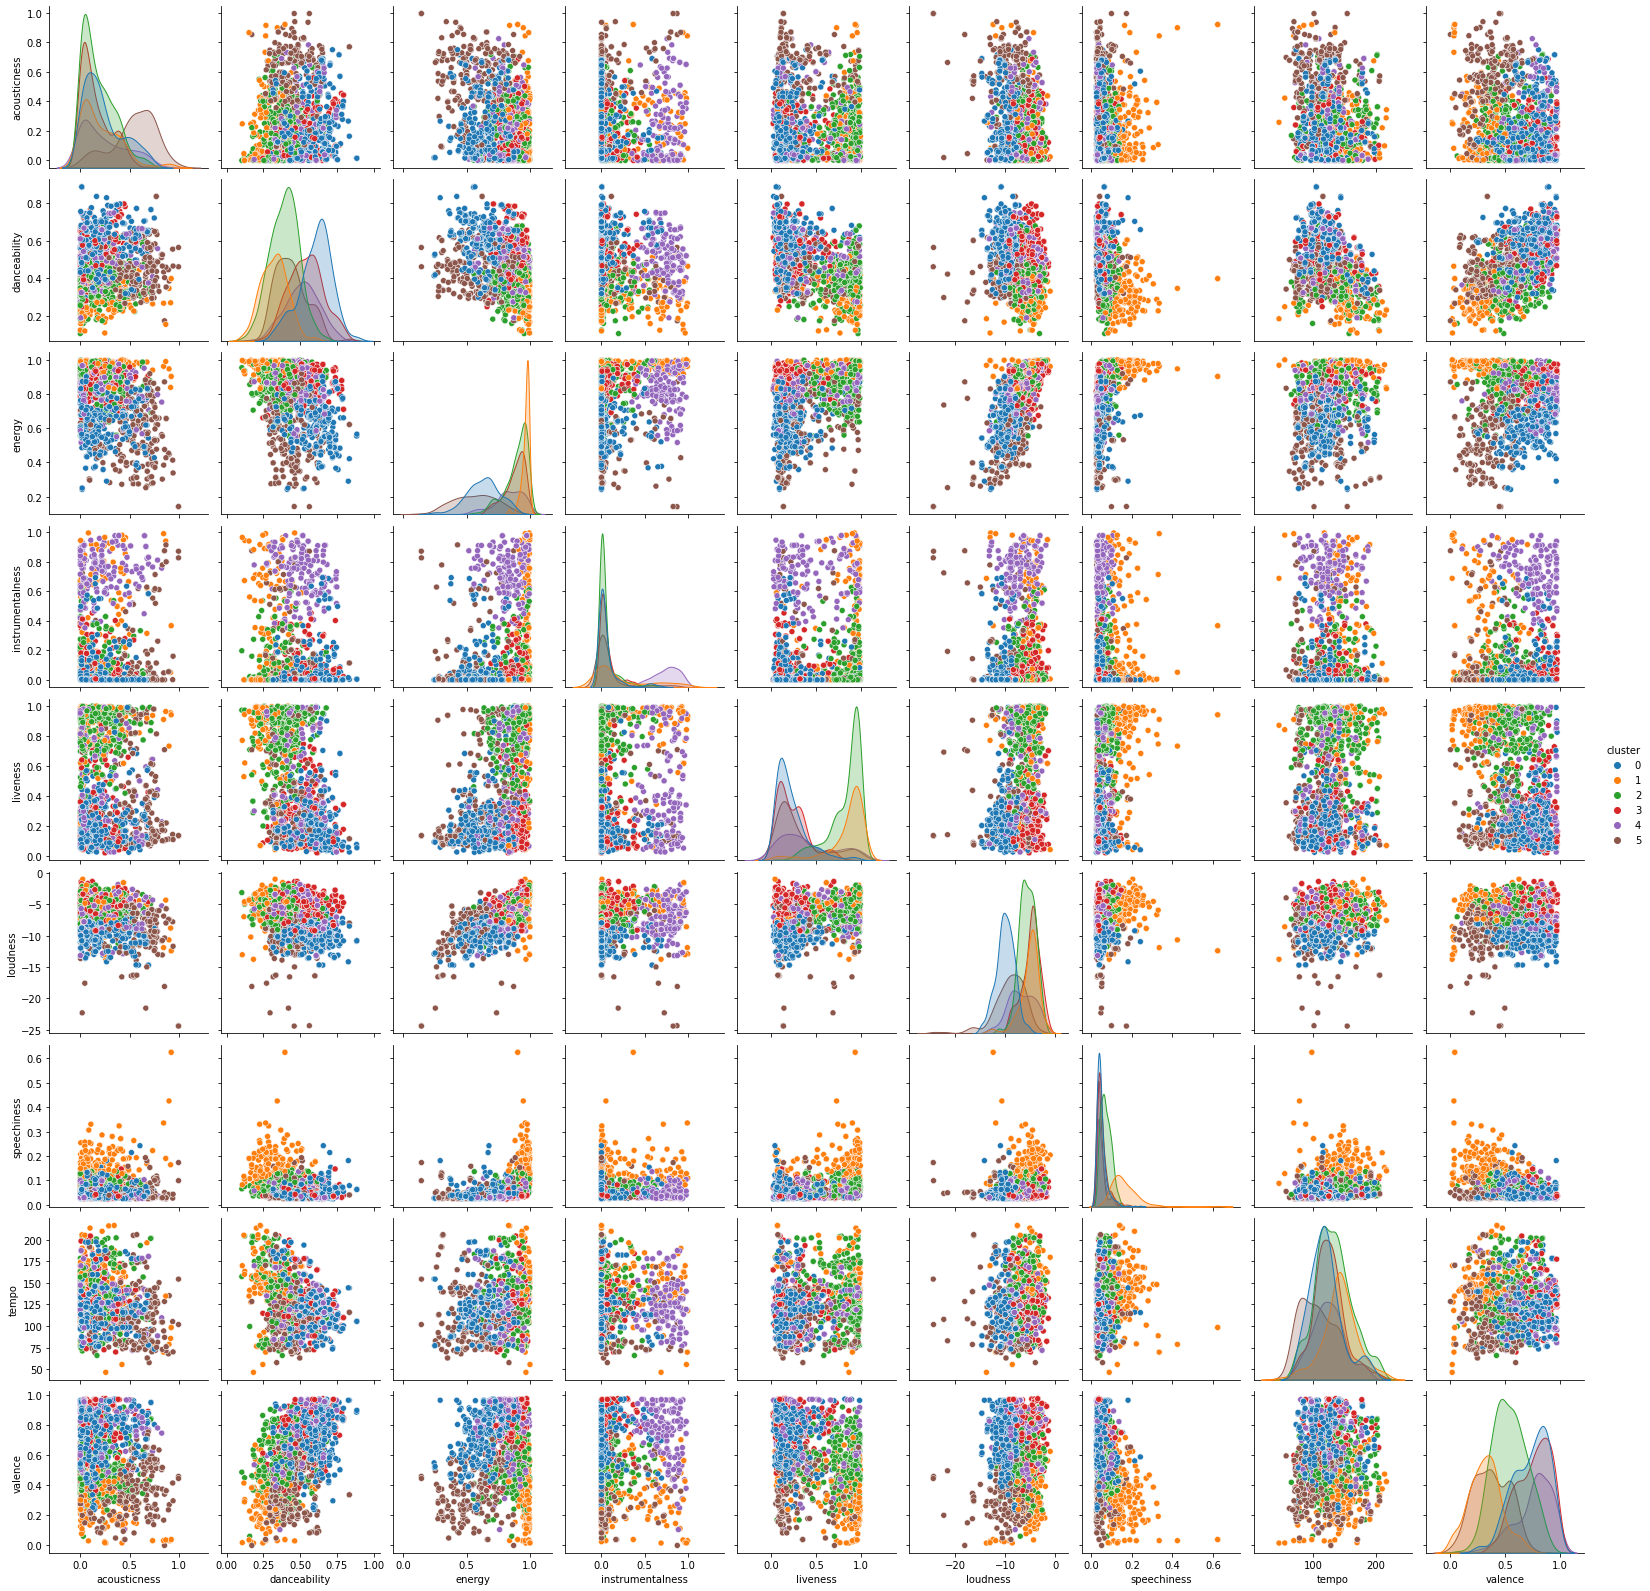

In [51]:
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                      'loudness', 'speechiness', 'tempo', 'valence']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_features])
kmeans = KMeans(n_clusters=6, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)
cluster_centers = kmeans.cluster_centers_
cluster_definitions = pd.DataFrame(cluster_centers, columns=numerical_features)
print("Cluster Definitions (Feature Means):")
print(cluster_definitions)
sns.pairplot(data, hue='cluster', vars=numerical_features, palette='tab10')
plt.show()
